In [1]:
using DiffGrating1D
using Plots; plotlyjs()
using LinearAlgebra
const DF = DiffGrating1D
include("geometry.jl")

┌ Warning: backend `PlotlyJS` is not installed.
└ @ Plots /home/rodrigo/.julia/packages/Plots/ju9dp/src/backends.jl:43


geometry_test (generic function with 1 method)

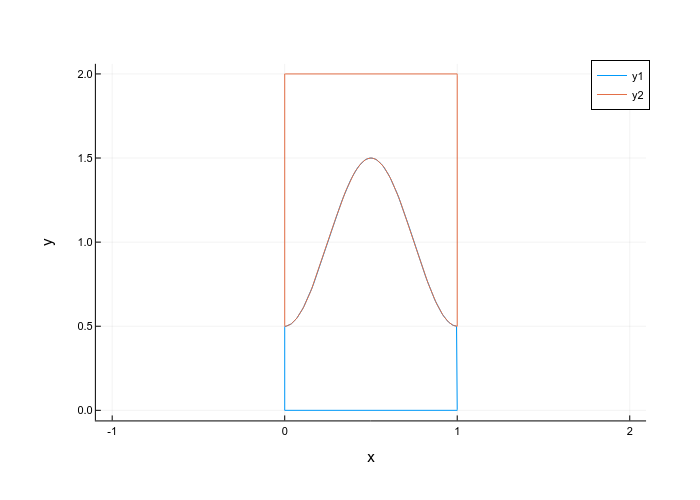

In [2]:
geo = geometry(;homogeneous=false);
#DF.check_geometry(geo;ϵtol=1e-4)
#DF.check_homogeneous_geometry(geo;ϵtol=1e-4)

plot(geo.domains[1],tangent=false,normal=false)
plot!(geo.domains[2],tangent=false,normal=false)

In [4]:

## Diffraction problem
u_reflected,r_coeff,u_transmitted,t_coeff = DF.solve_diffraction_problem(geo);

# diffraction efficiencies
_,β0 = DF.αβfactors(geo)  # β0 of incident wave
r_eff = @. geo.βtop/β0*abs2(r_coeff)
t_eff = @. geo.βbottom/β0*abs2(t_coeff);   # (geo.kbottom^2*geo.βbottom)/(geo.ktop^2*β0)*abs2(t_coeff)

┌ Info: Solving Domain 1
└ @ DiffGrating1D /home/rodrigo/Dropbox (MIT)/mit/semesters/spring-2024/18.369 Methods in Nanophotonics/project/DiffGrating1D/src/ntd_maps.jl:89
┌ Info: Solving Domain 2
└ @ DiffGrating1D /home/rodrigo/Dropbox (MIT)/mit/semesters/spring-2024/18.369 Methods in Nanophotonics/project/DiffGrating1D/src/ntd_maps.jl:89
┌ Info: Solving Top Domain
└ @ DiffGrating1D /home/rodrigo/Dropbox (MIT)/mit/semesters/spring-2024/18.369 Methods in Nanophotonics/project/DiffGrating1D/src/ntd_maps.jl:95
┌ Info: Done
└ @ DiffGrating1D /home/rodrigo/Dropbox (MIT)/mit/semesters/spring-2024/18.369 Methods in Nanophotonics/project/DiffGrating1D/src/ntd_maps.jl:111


In [6]:
# Reflectance and Transmittance
@info "Reflectance"
Jlist = -geo.Jmax:geo.Jmax
println(collect(zip(Jlist,r_eff)))
@info "Transmittance"
println(collect(zip(Jlist,t_eff)))

┌ Info: Reflectance
└ @ Main /home/rodrigo/Dropbox (MIT)/mit/semesters/spring-2024/18.369 Methods in Nanophotonics/project/DiffGrating1D/examples/ex1/notebook.ipynb:2


Tuple{Int64, ComplexF64}[(-7, 0.0 + 4.160818009059464e-16im), (-6, 0.0 + 3.812335062534513e-16im), (-5, 0.0 + 2.4467017665224875e-15im), (-4, 0.0 + 1.785692534271072e-11im), (-3, 0.0 + 9.66890115515366e-7im), (-2, 0.0035036070895861056 + 0.0im), (-1, 0.0007815039414643518 + 0.0im), (0, 0.002103160752659224 + 0.0im), (1, 0.0 + 0.00013280379897206908im), (2, 0.0 + 4.5217377570738973e-10im), (3, 0.0 + 5.679183088893576e-14im), (4, 0.0 + 4.871876905182994e-16im), (5, 0.0 + 3.868324147027469e-16im), (6, 0.0 + 4.713120286680182e-16im), (7, 0.0 + 5.584692033326643e-16im)]
Tuple{Int64, ComplexF64}[(-7, 0.0 + 1.1661880282600592e-16im), (-6, 0.0 + 1.4540748082339562e-16im), (-5, 0.0 + 5.0345092219147467e-14im), (-4, 0.0 + 3.2798431377406906e-9im), (-3, 0.019811921157424656 + 0.0im), (-2, 0.152034440481023 + 0.0im), (-1, 0.4947932937180725 + 0.0im), (0, 0.20866625019592583 + 0.0im), (1, 0.1183058054918842 + 0.0im), (2, 0.0 + 7.268398859276787e-7im), (3, 0.0 + 2.356128482120841e-12im), (4, 0.0 + 4

┌ Info: Transmittance
└ @ Main /home/rodrigo/Dropbox (MIT)/mit/semesters/spring-2024/18.369 Methods in Nanophotonics/project/DiffGrating1D/examples/ex1/notebook.ipynb:5
